In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
to_meV = 27211.6
to_nano = 0.05292

l = 100
bariera = 10
V_b = 30 / to_meV
dx = 0.5 / to_nano
m = 0.067

In [3]:
def Norm(arr):
    I = np.sum((np.abs(arr)**2)*dx)
    return arr / np.sqrt(I)

def Psi(arr, E, V):
    arr = np.array(arr,dtype=complex)
    for i in range(len(arr)-2)[::-1]:
        arr[i] = - 2 * m * (E - V[i+1]) * dx**2 * arr[i+1] - arr[i+2] + 2 * arr[i+1]
    return arr

/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib64/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, '$\\Psi^2$')

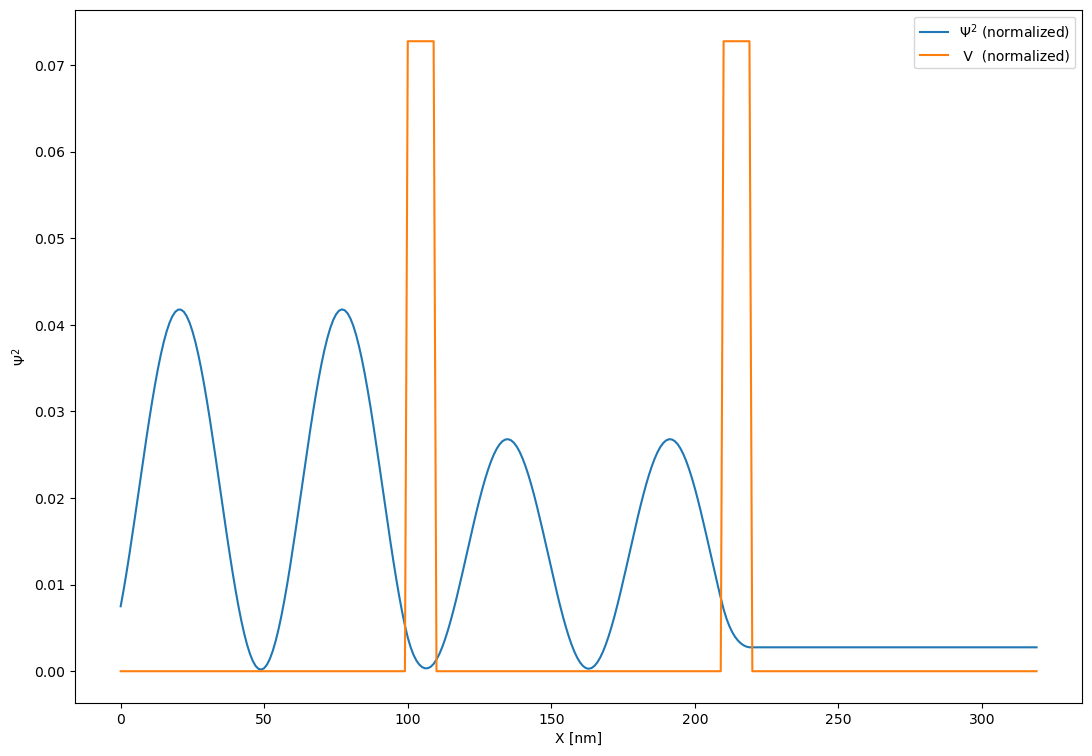

In [4]:
psi = np.zeros(3*l + 2*bariera, dtype=complex)
E = 7 / to_meV
q = np.sqrt(2 * m * E)
V = np.zeros(len(psi), dtype=complex)

V[100:110] = V_b
V[210:220] = V_b

psi[-1] = 1
psi[-2] = np.exp(-1j * q * dx)

psi = Psi(psi, E, V)

plt.figure(figsize=(13,9))
plt.plot(Norm(np.abs(psi)**2),label=r'$\Psi^2$ (normalized)')
plt.plot(Norm(V),label=' V  (normalized)')
plt.legend(loc='upper right')
plt.xlabel('X [nm]')
plt.ylabel(r'$\Psi^2$')

In [5]:
x = np.arange(0,3*l+2*bariera)*dx

def A_fun(arr):
    a = (arr[0]*np.exp(1j*q*x[0]) - arr[1]*np.exp(1j*q*x[1])) / (np.exp(1j*q*x[0])**2 - np.exp(1j*q*x[1])**2)
    return a

def B_fun(arr):
    b = - ((-arr[1]*np.exp(1j*q*x[0]) + arr[0]*np.exp(1j*q*x[1]))*np.exp((x[1] + x[0])*1j*q)) / (np.exp(1j*q*x[0])**2 - np.exp(1j*q*x[1])**2)
    return b

def T_fun(arr,E):
    q = np.sqrt(2*m*E)
    return 1/np.abs(A_fun(arr))**2

def R_fun(arr,E):
    q = np.sqrt(2*m*E)
    return (np.abs(B_fun(arr))**2) / (np.abs(A_fun(arr))**2)

In [6]:
R = (np.abs(B_fun(psi))**2) / (np.abs(A_fun(psi))**2)
R

0.7675156531966549

In [7]:
T = 1/np.abs(A_fun(psi))**2
T

0.23248434680333024

In [8]:
R+T

0.9999999999999851

In [9]:
A = A_fun(psi)
B = B_fun(psi)

X = np.arange(l)*dx
psi2 = np.zeros(l, dtype=complex)
psi2 = A * np.exp(1j*q*X) + B * np.exp(-1j*q*X)

# Bez normowania

Text(0, 0.5, '$\\Psi^2$')

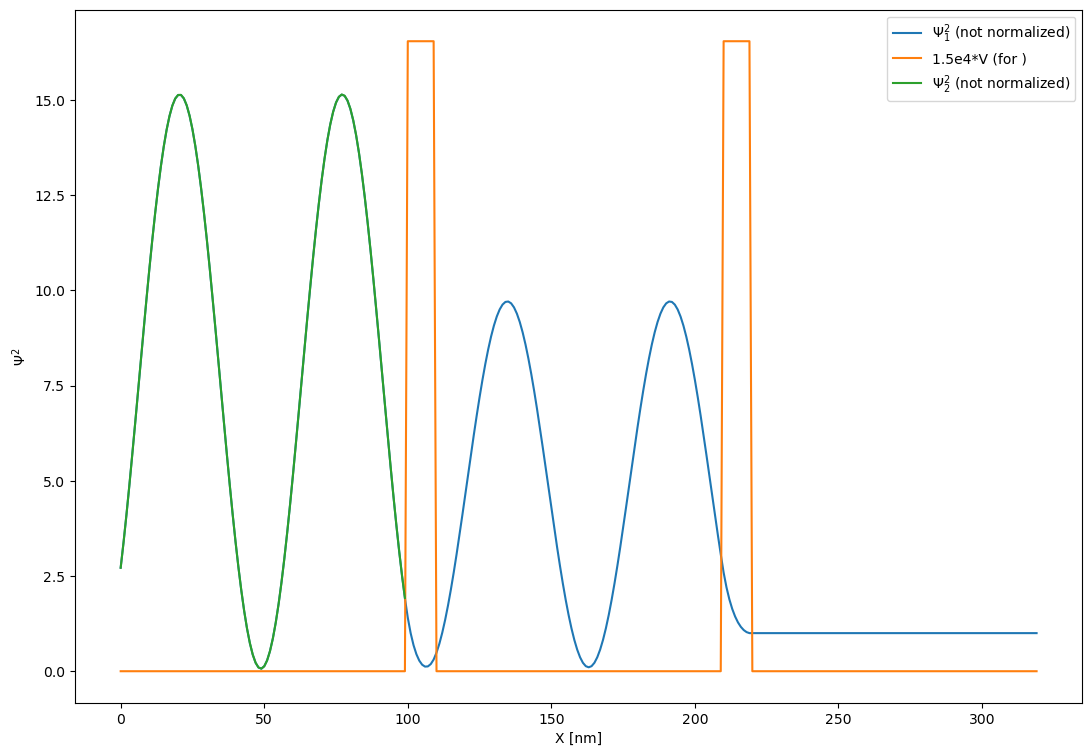

In [10]:
plt.figure(figsize=(13,9))
plt.plot((np.abs(psi)**2), label=r'$\Psi^2_1$ (not normalized)')
plt.plot(1.5e4*V, label='1.5e4*V (for )')
plt.plot(np.abs(psi2)**2, label=r'$\Psi^2_2$ (not normalized)')
plt.legend(loc='upper right')
plt.xlabel('X [nm]')
plt.ylabel(r'$\Psi^2$')

# Z normowaniem

Text(0.5, 0, 'X [nm]')

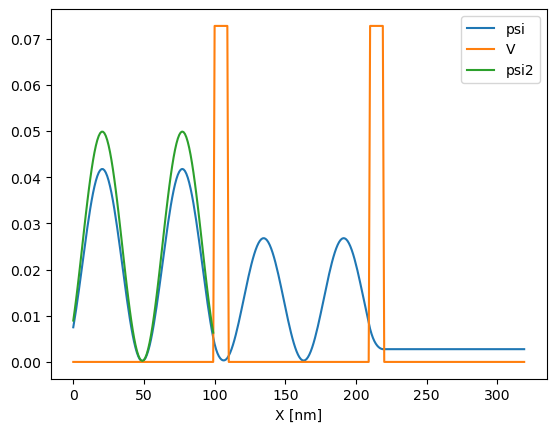

In [11]:
plt.figure()
plt.plot(Norm(np.abs(psi)**2), label='psi')
plt.plot(Norm(V), label='V')
plt.plot(Norm(np.abs(psi2)**2), label='psi2')
plt.legend()
plt.xlabel('X [nm]')

In [12]:
En = np.linspace(0.001,50,1000) / to_meV
arr_T = np.zeros(len(En))
arr_R = np.zeros(len(En))

for k in range(len(En)):
    q = np.sqrt(2*m*En[k])
    psi3 = np.zeros(3*l + 2*bariera, dtype=complex)
    psi3[-1] = 1
    psi3[-2] = np.exp(-1j * q * dx)
    psi3 = Psi(psi3, En[k], V)
    arr_T[k] = T_fun(psi3, En[k])
    arr_R[k] = R_fun(psi3, En[k])

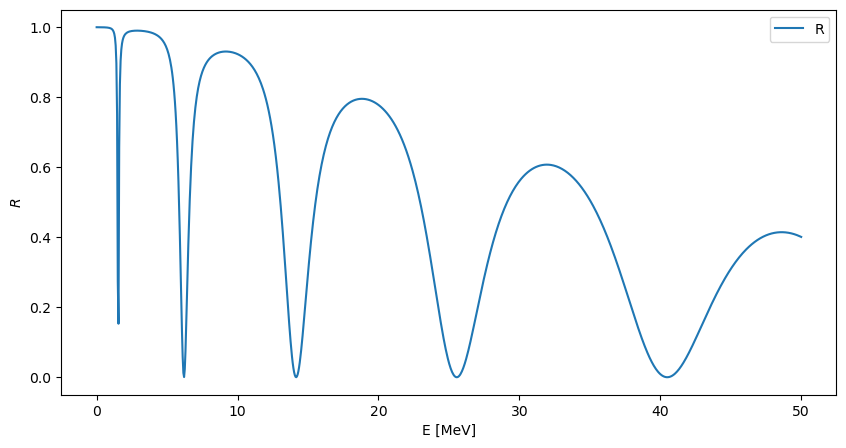

In [13]:
plt.figure(figsize=(10,5))
plt.plot(En*to_meV,arr_R, label=r'R')
plt.xlabel('E [MeV]')
plt.ylabel(r'$R$')
plt.legend(loc='upper right')

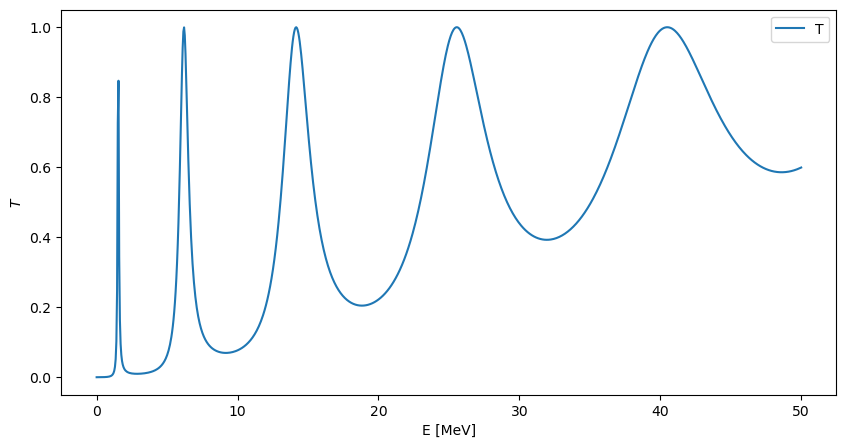

In [14]:
plt.figure(figsize=(10,5))
plt.plot(En*to_meV,arr_T, label=r'T')
plt.xlabel('E [MeV]')
plt.ylabel(r'$T$')
plt.legend(loc='upper right')

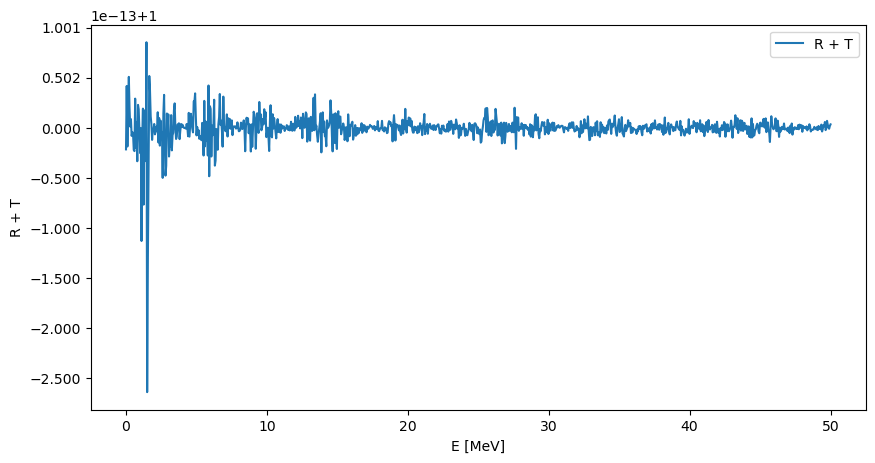

In [15]:
plt.figure(figsize=(10,5))
plt.plot(En*to_meV,arr_T + arr_R, label=r'R + T')
plt.xlabel('E [MeV]')
plt.ylabel('R + T')
plt.legend(loc='upper right')

In [16]:
arr_E = []
index = []
for i in range(1,len(arr_T)-1):
    if arr_T[i-1] < arr_T[i] and arr_T[i] > arr_T[i+1]:
        arr_E.append(En[i])
        index.append(i-1)
index

[30, 123, 282, 510, 808]

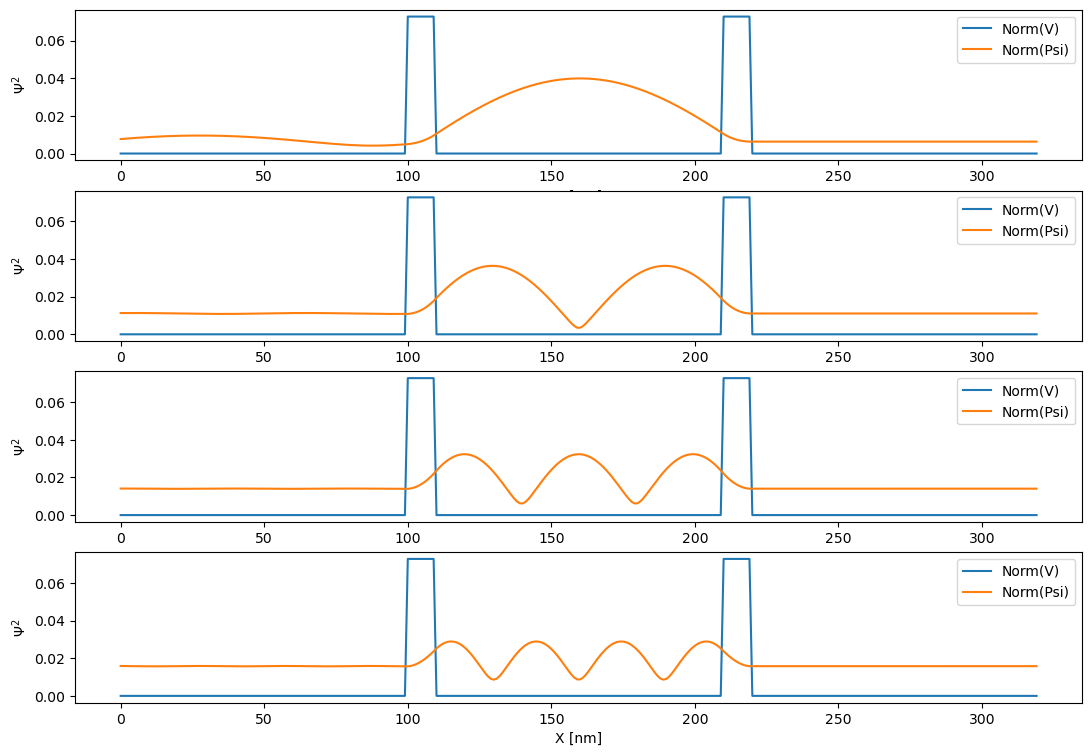

In [17]:
plt.figure(figsize=(13,9))
for i in range(1,5):
    q = np.sqrt(2*m*arr_E[i-1])
    psi4 = np.zeros(3*l + 2*bariera, dtype=complex)
    psi4[-1] = 1
    psi4[-2] = np.exp(-1j * q * dx)

    plt.subplot(4,1,i)
    psi4 = Psi(psi4, arr_E[i-1], V)
    plt.plot(Norm(V), label = r'Norm(V)')
    plt.plot(np.abs(Norm(psi4)), label = r'Norm(Psi)')
    plt.xlabel('X [nm]')
    plt.ylabel(r'$\Psi^2$')
    plt.legend(loc='upper right')